In [24]:
# top 10 songs 
# go through the dictionary and create a counter of the top10 songs tokens


from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot
import json
from collections import defaultdict
import os
import fnmatch
import numpy as np
from datetime import datetime

In [25]:
def find_all(name, path):
    l={}
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
#             print (filename)
#             print (load_album("../"+filename)[0]['release_date'])
            l[filename]=load_album("../male_lyrics/"+filename)[0]['release_date']
#     sorted_songs_artist = sorted(l, key=lambda x: x["release_date"])    
    l={k: v for k, v in sorted(l.items(), key=lambda item: item[1])}
    print (list(l.keys()))
    sortedl=list(l.keys())
    return sortedl

In [26]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [27]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score


In [28]:
word_weights = load_word_weights("bingliu.csv")

In [29]:
# import pandas as pd
# data = pd.read_csv("top10.csv")

import csv

from collections import defaultdict

top10dict=defaultdict(list)
input_file = csv.DictReader(open("top10.csv"))
for row in input_file:
    top10dict[row["author"]].append({"album":row["album"],"song":row["song"],"year":row["year"],"list_count":row["listen_count"]})

In [30]:
filenames=find_all("Tyler","../male_lyrics")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [40]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            if album in ['Get Well Soon...','Kon the Louis Vuitton Don','I’m Good']:
#                 print (album)
                album="The College Dropout"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            elif album in ['Can’t Tell Me Nothing']:
#                 print (album)
                album="Late Registration"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            else:
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
    return paragraphs

In [41]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../male_lyrics")
    
    
    for file in filenames:
         complete.extend(load_album("../male_lyrics/"+file))
      
    
    return complete

In [49]:
complete_sentiment=load_artist("Tyler,")
complete_sentiment_frank=load_artist("Frank")
complete_sentiment_childish=load_artist("Childish")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']
['Lyrics_FrankOcean{.nostalgia-ULTRA.json', 'Lyrics_FrankOcean{.Channel-Orange.json', 'Lyrics_FrankOcean{.Endless.json', 'Lyrics_FrankOcean{.Blonde.json']
['Lyrics_ChildishGambino{.Culdesac.json', 'Lyrics_ChildishGambino{.I-Am-Just-a-Rapper.json', 'Lyrics_ChildishGambino{.Camp.json', 'Lyrics_ChildishGambino{.Because-the-Internet.json', 'Lyrics_ChildishGambino{.STN-MTN-Kauai.json', 'Lyrics_ChildishGambino{.Awaken-My-Love.json', 'Lyrics_ChildishGambino{.Summer-Pack.json']


In [50]:
complete_sentiment[33]

{'title': 'BUFFALO',
 'album': 'Cherry Bomb',
 'text': '"Yeah!"\n"You feel alright?"\n"Yeah!"\n\nGod, goodness gracious\nI can\'t wait to see the look on y\'all niggas faces\nThat boy T nuts, surprised his thoughts isn\'t chafing\nAnd fuck them crackers up at Mountain Dew, them niggas is racist\nCabbage was made, critic faggots was shook\nSo I told \'em that I\'ll exchange the word "faggot" with "book"\nAnd all them "books" is pissed off and had they page in a bunch\nFucking attitude switched just like a "book" when it struts\nBut I\'m a fraud, I pray to God when the six triple "book" bashing\nWhile me and my favorite author\'s lips tickle\nPeter Parker pick a pack of peppers when the plot thickens\nTyler, The Creator fucking kill you with a popsicle\nCold blooded, so we rock mittens so they won\'t find him\nNot kidding, keep the Tommy on me; bitch, I\'m Ms. Pickles\nSaid I seemed off, last time that team talked\nSick of making niggas cabbage so I took the \'Preme off\nShould\'ve bough

In [51]:
top10dict

defaultdict(list,
            {'Tyler, The Creator': [{'album': 'IGOR',
               'song': 'EARFQUAKE',
               'year': '2019',
               'list_count': '219824308'},
              {'album': 'Flower Boy',
               'song': 'See You Again',
               'year': '2017',
               'list_count': '199766894'},
              {'album': 'IGOR',
               'song': 'I THINK',
               'year': '2019',
               'list_count': '62609572'},
              {'album': 'Flower Boy',
               'song': 'Boredom',
               'year': '2017',
               'list_count': '112151845'},
              {'album': 'Flower Boy',
               'song': '911/Mr.Lonely\n',
               'year': '2017',
               'list_count': '126729390'},
              {'album': 'IGOR',
               'song': 'A BOY IS A GUN',
               'year': '2019',
               'list_count': '40394041'},
              {'album': 'IGOR',
               'song': 'GONE, GONE / THANK YOU',


In [61]:
top10=[]

# print (top10dict)
for x in top10dict["Tyler, The Creator"]:
    print (x)
    for y in complete_sentiment:
        newstr = y['title'].replace("*", "")
        if newstr==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

{'album': 'IGOR', 'song': 'EARFQUAKE', 'year': '2019', 'list_count': '219824308'}
{'album': 'Flower Boy', 'song': 'See You Again', 'year': '2017', 'list_count': '199766894'}
{'album': 'IGOR', 'song': 'I THINK', 'year': '2019', 'list_count': '62609572'}
{'album': 'Flower Boy', 'song': 'Boredom', 'year': '2017', 'list_count': '112151845'}
{'album': 'Flower Boy', 'song': '911/Mr.Lonely\n', 'year': '2017', 'list_count': '126729390'}
{'album': 'IGOR', 'song': 'A BOY IS A GUN', 'year': '2019', 'list_count': '40394041'}
{'album': 'IGOR', 'song': 'GONE, GONE / THANK YOU', 'year': '2019', 'list_count': '35371293'}
{'album': 'IGOR', 'song': 'RUNNING OUT OF TIME', 'year': '2019', 'list_count': '44607808'}
{'album': 'IGOR', 'song': 'NEW MAGIC WAND', 'year': '2019', 'list_count': '40843358'}


[{'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already k

[{'title': 'GONE, GONE / THANK YOU', 'album': 'IGOR', 'text': "Comparing scars before dinner\nJump off the roof into the mirror\nFelt like summer to my December\nWas it my August? Shit, I don't remember\n(Two, three, go)\nI know my temperature was set\nYou finally flew south\nThe bird gon' leave the nest, you're so chromatic\nAt least I had it (Uh)\nInstead of never\nOr maybe I'm too dramatic\n(Two, three, go)\n\nWhether it's rain or shine, I know I'm fine for now\nMy love's gone, my love's gone\nMy love's gone, oh, gone\n(Two, three, go)\nOr maybe it's just a dream that I can't seem to wake up from\nMy love's gone, my love's gone\nMy love's gone, gone\n\nGone, gone, gone, gone, gone\n\nI know love is, is all I got\nI just hope to God she got good taste\nCould put you on some shit you never seen\nCould play a couple songs that you could dance to\nI hope you know she can't compete with me\n\nWhether it's rain or shine, I know I'm fine for now\nMy love's gone, my love's gone\nMy love's g

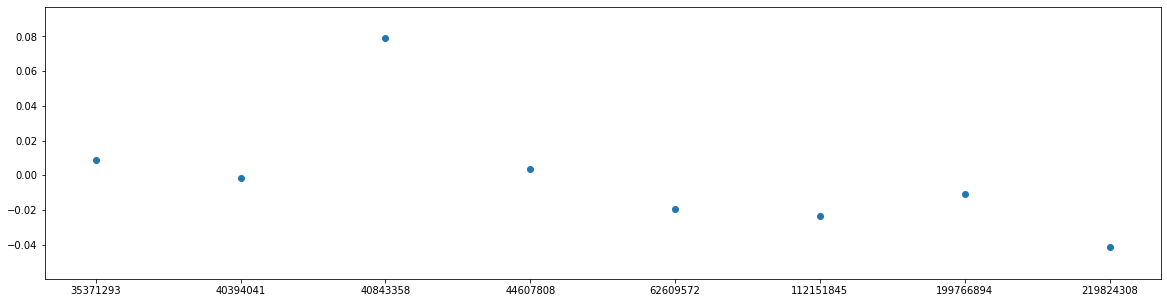

array([ 0.00866551, -0.00169205,  0.07883817,  0.00380228, -0.01932367,
       -0.02325581, -0.01091703, -0.04155844])

In [53]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10, key=lambda x: int(x["play_count"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(play_count,score_count)
pyplot.show()

score_count

In [54]:
top10=[]

# print (top10dict)
for x in top10dict["Frank Ocean"]:
    for y in complete_sentiment_frank:
        if y['title']==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

[{'title': 'Nights',
  'album': 'Blonde ',
  'text': "Round your city, round the clock\nEverybody needs you\nNo, you can't make everybody equal\nAlthough you got beaucoup family\nYou don't even got nobody bein' honest with you\nBreathe 'til I evaporated\nMy whole body see through\nTransportation, handmade (G)\nAnd I know it better than most people\nI don't trust 'em anyways\nYou can't break the law with them\nGet some gushy, have a calm night\nShooters killin' left and right\nWorkin' through your worst night\nIf I get my money right\nYou know I won't need you\nAnd I tell you, (bitch)\nI hope the sack is full up\nI'm fuckin', no, I'm fucked up\nSpend it when I get that\nI ain't tryna keep you\nCan't keep up a conversation\nCan't nobody reach you\nWhy your eyes well up?\nDid you call me from a séance?\nYou are from my past life\nHope you're doin' well, bruh\nI been out here head first\nAlways like the head first\nSignal comin' in and out\nHope you're doin' well, bruh\nEverybody needs you

[{'title': 'White Ferrari', 'album': 'Blonde ', 'text': "Bad luck to talk on these rides\nMine on the road, your dilated eyes watch the clouds float\nWhite Ferrari, had a good time\n(Sweet 16, how was I supposed to know anything?)\nI let you out at Central\nI didn't care to state the plain\nKept my mouth closed, we're both so familiar\nWhite Ferrari, good times\nStick by me, close by me\nYou were fine, you were fine here\nThat's just a slow body\nYou left when I forgot to speak\nSo I text the speech, lesser speeds, Texas speed, yes\nBasic takes its toll on me, 'ventually, 'ventually, yes\nAhh, on me 'ventually, 'ventually, yes\nI care for you still and I will forever\nThat was my part of the deal, honest\nWe got so familiar\nSpending each day of the year\nWhite Ferrari, good times\nIn this life (life), in this life (life)\nOne too many years\nSome tattooed eyelids on a facelift\n(Thought you might want to know now)\nMind over matter is magic, I do magic\nIf you think about it, it'll be

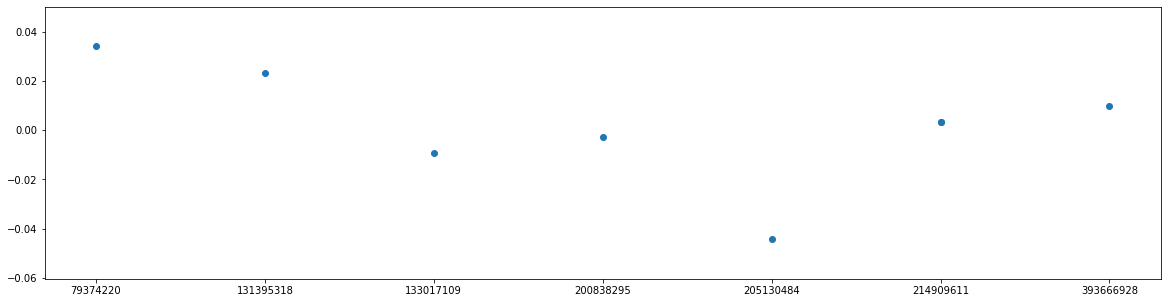

array([ 0.03409091,  0.02347418, -0.00917431, -0.00263852, -0.04437401,
        0.00334448,  0.00334448,  0.00990099])

In [55]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10, key=lambda x: int(x["play_count"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(play_count,score_count)
pyplot.show()

score_count

In [58]:
top10=[]

print (top10dict)
for x in top10dict["Childish Gambino"]:
    for y in complete_sentiment_childish:
        if y['title']==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

defaultdict(<class 'list'>, {'Tyler, The Creator': [{'album': 'IGOR', 'song': 'EARFQUAKE', 'year': '2019', 'list_count': '219824308'}, {'album': 'Flower Boy', 'song': 'See You Again', 'year': '2017', 'list_count': '199766894'}, {'album': 'IGOR', 'song': 'I THINK', 'year': '2019', 'list_count': '62609572'}, {'album': 'Flower Boy', 'song': 'Boredom', 'year': '2017', 'list_count': '112151845'}, {'album': 'Flower Boy', 'song': '911/Mr.Lonely\n', 'year': '2017', 'list_count': '126729390'}, {'album': 'IGOR', 'song': 'A BOY IS A GUN', 'year': '2019', 'list_count': '40394041'}, {'album': 'IGOR', 'song': 'GONE, GONE / THANK YOU', 'year': '2019', 'list_count': '35371293'}, {'album': 'IGOR', 'song': 'RUNNING OUT OF TIME', 'year': '2019', 'list_count': '44607808'}, {'album': 'IGOR', 'song': 'NEW MAGIC WAND', 'year': '2019', 'list_count': '40843358'}], 'Frank Ocean': [{'album': 'Blonde', 'song': 'Nights', 'year': '2016', 'list_count': '205130484'}, {'album': 'Blonde', 'song': 'Pink + White', 'year'

[{'title': 'Redbone',
  'album': '“Awaken, My Love!”',
  'text': "Daylight\nI wake up feeling like you won't play right\nI used to know, but now that shit don't feel right\nIt made me put away my pride\nSo long\nYou made a nigga wait for some, so long\nYou make it hard for boy like that to go on\nI'm wishing I could make this mine, oh\n\nIf you want it, yeah\nYou can have it, oh, oh, oh\nIf you need it, ooh\nWe can make it, oh\nIf you want it\nYou can have it\n\nBut stay woke\nNiggas creepin'\nThey gon' find you\nGon' catch you sleepin' (Ooh)\nNow stay woke\nNiggas creepin'\nNow don't you close your eyes\n\nToo late\nYou wanna make it right, but now it's too late\nMy peanut butter chocolate cake with Kool-Aid\nI'm trying not to waste my time\n\nIf you want it, oh\nYou can have it, you can have it\nIf you need it\nYou better believe in something\nWe can make it\nIf you want it\nYou can have it, ah!\n\nBut stay woke (Stay woke!)\nNiggas creepin' (They be creepin')\nThey gon' find you (Th

['138722750' '139107887' '182987756' '234612050' '679053748']
[ 0.18581907 -0.01527778 -0.01176471 -0.00940439  0.        ]


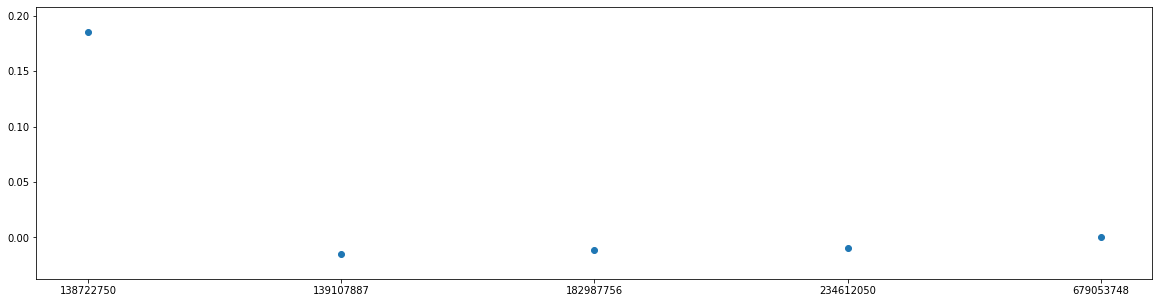

array([ 0.18581907, -0.01527778, -0.01176471, -0.00940439,  0.        ])

In [60]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10, key=lambda x: int(x["play_count"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
# print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(play_count,score_count)
pyplot.show()

score_count